# Background

This notebook will be exploring the viability of the dataset for use in ML through KNN, LR, & SVM. The reference for this ML Test is found in this [GitHub link](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb).

# Importing Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.model_selection as model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import svm

train_timers = []
predict_timers = []
train_mem = []
predict_mem = []

# Importing Datasets

Note that these datasets that are being used are the ones already pre-processed by the notebook: `[Datasets] - Thesis Notebook.ipynb`

## 0. Reference APIs

For use later when transforming data from string APIs to numeric form to be compatible for use in ML training.

In [2]:
def getAPIs():
    apis = pd.read_csv('CombinedAPIs.csv', low_memory=False)
    apis = apis['api'].to_list()
    apis.append('nan') #Take note of this
    return apis

apis = getAPIs()

## 1. MalbehavD Dataset

In [3]:
malbehavd = pd.read_csv('MalbehavD-V1.csv', low_memory=False)
malbehavd.head()

,sha256,malware,0,1,2,3,4,5,6,7,...,165,166,167,168,169,170,171,172,173,174
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Catak Dataset

In [4]:
catak = pd.read_csv('Catak.csv', low_memory=False)
catak.head()

,malware_type,malware,0,1,2,3,4,5,6,7,...,156,157,158,159,160,161,162,163,164,165
0,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Trojan,1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Backdoor,1,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Backdoor,1,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trojan,1,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Oliveira Dataset

In [5]:
oliveira = pd.read_csv('Oliveira.csv', low_memory=False)
oliveira.head()

,hash,malware,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,071e8c3f8922e186e57548cd4c703a5d,1,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,33f8e6d08a6aae939f25a8e0d63dd523,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,b68abd064e975e1c6d5f25e748663076,1,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,72049be7bd30ea61297ea624ae198067,1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,c9b3700a77facf29172f32df6bc77f48,1,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


## 1. Determine features

Determine what features, or for our case, behaviors are associated in each ith API call of the executable.

### 1.1 Preview Features

In [6]:
malbehavd_feats = []
for i in range(malbehavd.shape[1]-2):
    malbehavd_feats.append(str(i))
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtClose,GetFileVersionInfoSizeW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,NtQueryValueKey,RegCloseKey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,RegQueryValueExW,NtMapViewOfSection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,NtQueryAttributesFile,LdrGetDllHandle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
catak_feats = []
for i in range(catak.shape[1]-2):
    catak_feats.append(str(i))
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GetSystemTimeAsFileTime,NtAllocateVirtualMemory,NtFreeVirtualMemory,LdrGetDllHandle,LdrGetProcedureAddress,SetUnhandledExceptionFilter,NtCreateMutant,NtClose,LdrLoadDll,GetSystemInfo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LdrGetDllHandle,LdrGetProcedureAddress,GetSystemDirectoryA,CopyFileA,RegOpenKeyExA,RegSetValueExA,RegCloseKey,RegCreateKeyExA,NtCreateFile,SetFilePointer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LdrLoadDll,LdrGetProcedureAddress,RegOpenKeyExA,NtOpenKey,NtOpenKeyEx,NtQueryValueKey,NtClose,NtQueryAttributesFile,LoadStringA,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LdrLoadDll,LdrGetProcedureAddress,WSAStartup,NtCreateMutant,RegOpenKeyExA,RegDeleteKeyA,RegCloseKey,CopyFileA,RegSetValueExA,NtCreateFile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
oliveira_feats = []
for i in range(oliveira.shape[1]-2):
    oliveira_feats.append(str(i))
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,HttpSendRequestA,WSAAccept,NtCreateSection,Process32NextW,WSAAccept,NtCreateSection,Process32NextW,recvfrom,GetFileAttributesW,OleInitialize,...,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData,OleInitialize,FindFirstFileExW,GetComputerNameW
1,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,FindResourceW,GetFileType,RemoveDirectoryW,InternetConnectA,GetComputerNameW,recv,LdrGetProcedureAddress,NtLoadDriver,Process32NextW,CryptHashData
2,CreateActCtxW,HttpOpenRequestW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,...,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestA,InternetGetConnectedStateExW,GetAdaptersAddresses,HttpSendRequestW,HttpSendRequestA
3,GetFileVersionInfoExW,OleInitialize,NtQueryKey,OleInitialize,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,NtLoadKey,InternetConnectA,...,Process32NextW,OleInitialize,setsockopt,OleInitialize,setsockopt,NtQueryKey,OleInitialize,setsockopt,RegEnumValueA,setsockopt
4,GetFileVersionInfoExW,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,RemoveDirectoryW,InternetConnectA,NtLoadKey,...,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,CryptUnprotectMemory,OpenSCManagerA,SetStdHandle,LookupAccountSidW,SetStdHandle,LookupAccountSidW,SetStdHandle


### 1.2 Converting string features to int features

The technique to be used here will be LabelEncoder.

Basically what it does it converts string API calls to numeric equivalent.

This however means that the deployed model will require on the 'transformed' values as per the APIs listed in the `CombinedAPIs.csv` with an included `'nan'` value which is referred to in the notebook as `apis`.

#### 1.2.1 Preparing LabelEncoder

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(apis)

LabelEncoder()

#### 1.2.2 MalbehavD

In [10]:
for f in malbehavd_feats:
    malbehavd[f] = pd.Series(le.fit_transform(malbehavd[f]))
X = malbehavd[malbehavd_feats]
malbehavd[malbehavd_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,26,2,65,52,29,31,44,37,63,31,...,1,1,1,1,1,1,1,1,1,1
1,35,19,65,9,78,92,46,1,85,98,...,1,1,1,1,1,1,1,1,1,1
2,14,7,26,35,34,77,94,22,105,73,...,1,1,1,1,1,1,1,1,1,1
3,39,31,35,95,66,43,85,54,62,48,...,1,1,1,1,1,1,1,1,1,1
4,26,23,60,94,104,83,56,53,81,48,...,1,1,1,1,1,1,1,1,1,1


#### 1.2.3 Catak

In [11]:
for f in catak_feats:
    catak[f] = pd.Series(le.fit_transform(catak[f]))
X = catak[catak_feats]
catak[catak_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
1,19,39,54,41,45,118,67,54,46,38,...,6,3,4,3,2,2,2,2,1,1
2,25,32,22,2,99,109,106,96,57,121,...,6,3,4,3,2,2,2,2,1,1
3,27,32,87,66,71,84,64,75,49,61,...,6,3,4,3,2,2,2,2,1,1
4,27,32,106,55,99,101,106,4,108,63,...,6,3,4,3,2,2,2,2,1,1


#### 1.2.4 Oliveira

In [12]:
for f in oliveira_feats:
    oliveira[f] = pd.Series(le.fit_transform(oliveira[f]))
X = oliveira[oliveira_feats]
oliveira[oliveira_feats].head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,36,74,54,68,108,71,91,123,32,88,...,73,41,177,83,103,126,23,128,34,40
1,22,54,62,65,71,54,75,52,76,53,...,35,49,143,72,42,174,85,110,135,23
2,3,32,75,43,92,54,97,52,96,53,...,77,39,72,77,39,68,79,41,73,69
3,22,54,62,65,71,54,75,52,76,53,...,129,122,180,126,182,109,128,185,141,177
4,22,63,42,74,51,98,56,96,55,76,...,26,123,153,26,125,152,88,159,90,152


## 2. Determine labels

Determine what are the different labels that the combined features will result into. For this case, it will be either malicious (1) or not malicious (0).

In [13]:
y = malbehavd['malware'].to_numpy()
labels = malbehavd['malware'].unique()
print("MalbehavD - No. of unique labels: ", labels.size)
print(labels)

MalbehavD - No. of unique labels:  2
[0 1]


In [14]:
y = catak['malware'].to_numpy()
labels = catak['malware'].unique()
print("Catak - No. of unique labels: ", labels.size)
print(labels)

Catak - No. of unique labels:  1
[1]


In [15]:
y = oliveira['malware'].to_numpy()
labels = oliveira['malware'].unique()
print("Oliviera - No. of unique labels: ", labels.size)
print(labels)

Oliviera - No. of unique labels:  2
[1 0]


## 3. Dataset Selector
To automate the selection process as suppose to hard-coding changes, a dataset selector is made.

Simply change the input parameter for the `dataset_selector(dataset:int)`. The choices are:
- 0 - MalbehavD
- 1 - Catak
- 2 - Oliveira

In [16]:
def dataset_selector(dataset:int):
    if dataset == 0:
        return malbehavd[malbehavd_feats], malbehavd['malware'].to_numpy()
    elif dataset == 1:
        return catak[catak_feats], catak['malware'].to_numpy()
    elif dataset == 2:
        return oliveira[oliveira_feats], oliveira['malware'].to_numpy()
X, y = dataset_selector(2)

## 3. Divide Training Data from Test Data

Divide the dataset into training and test data. For this test, it will be divided into 80:20 for train:test respectively.

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20, random_state=1)

In [18]:
cr = [] #Classification reports list; Entries as ['algo_label',algo_cr]
cm = [] #Confusion matrices list; Entries as ['algo_label', algo_cf]

# ML Proper

### ML Algorithms used:
1. K-Nearest Neighbors (KNN)
2. Logistic Regression (LR)
3. Decision Tree (DT/DTC)
4. Support Vector Machine (SVM)*
5. Random Forest (RF)*
6. Gaussian Naive Bayes (GNB)*
7. AdaBoost*
8. Multi-layer Perceptron (MLP)*
9. Gradient Tree Boosting*

*Newly Implemented

AdaBoost, despite being a boosted model like XGBoost and LGBM, is actually an old boosted model, being created way back in 1995. For reference here is the summary table of the different known boosted ML algorithms:

| Algorithm                      | AdaBoost                    | XGBoost                     | CatBoost                                    | LightGBM                    |
|--------------------------------|-----------------------------|-----------------------------|---------------------------------------------|-----------------------------|
| Year                           | 1995                        | 2014                        | 2017                                        | 2017                        |
| Handling Categorical Variables | No (Conversion is required) | No (Conversion is required) | Automatically handles categorical variables | No (Conversion is required) |
| Memory Usage                   | Low                         | Moderate                    | High                                        | Low                         |
| Parallel Processing            | No                          | Yes                         | Yes                                         | Yes                         |
| GPU Support                    | No                          | Yes                         | Yes                                         | Yes                         |
| Regularization                 | No                          | Yes                         | Yes                                         | Yes                         |
| Speed/Scalability              | Fast                        | Fast                        | Moderate                                    | Fast                        |

### Reference:
- [Boosted Algorithms](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/)
- [SciKit Learn](https://scikit-learn.org/stable/supervised_learning.html)

## 4. K-Nearest Neighbors

### 4.1 Load and 'Train' K Neighbors Classifier Model

In [19]:
knn = KNeighborsClassifier() #default: neighbors = 5, p = 2, leaf size = 30
startTime = time.time()
knn.fit(X,y)
train_timers.append(["KNN Default: ", time.time()-startTime])

### 4.2. Test Predictions

In [20]:
startTime = time.time()
y_pred = knn.predict(X_test)
predict_timers.append(["KNN Default: ", time.time()-startTime])

### 4.3 Create Classifier Report

In [21]:
knn_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['KNN', knn_cr])
print(knn_cr)

              precision    recall  f1-score   support

           0     0.9292    0.4667    0.6213       225
           1     0.9861    0.9991    0.9926      8551

    accuracy                         0.9854      8776
   macro avg     0.9577    0.7329    0.8069      8776
weighted avg     0.9847    0.9854    0.9830      8776



### 4.4 K-NN Confusion Matrix

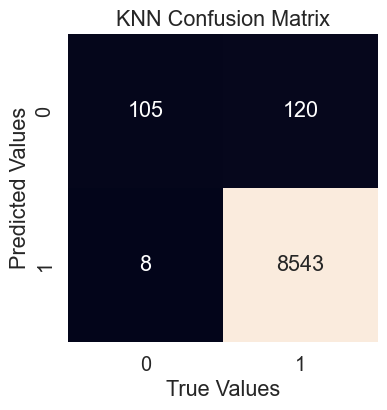

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
knn_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['KNN', knn_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 5. Decision Trees Classifier (DTC)

### 5.1. Load and 'Train' Decision Tree Classifier Model

In [23]:
dtc = DecisionTreeClassifier(random_state=1) #default: no max depth
startTime = time.time()
dtc.fit(X,y)
train_timers.append(["DTC Default: ", time.time()-startTime])

### 5.2. Plot Decision Tree

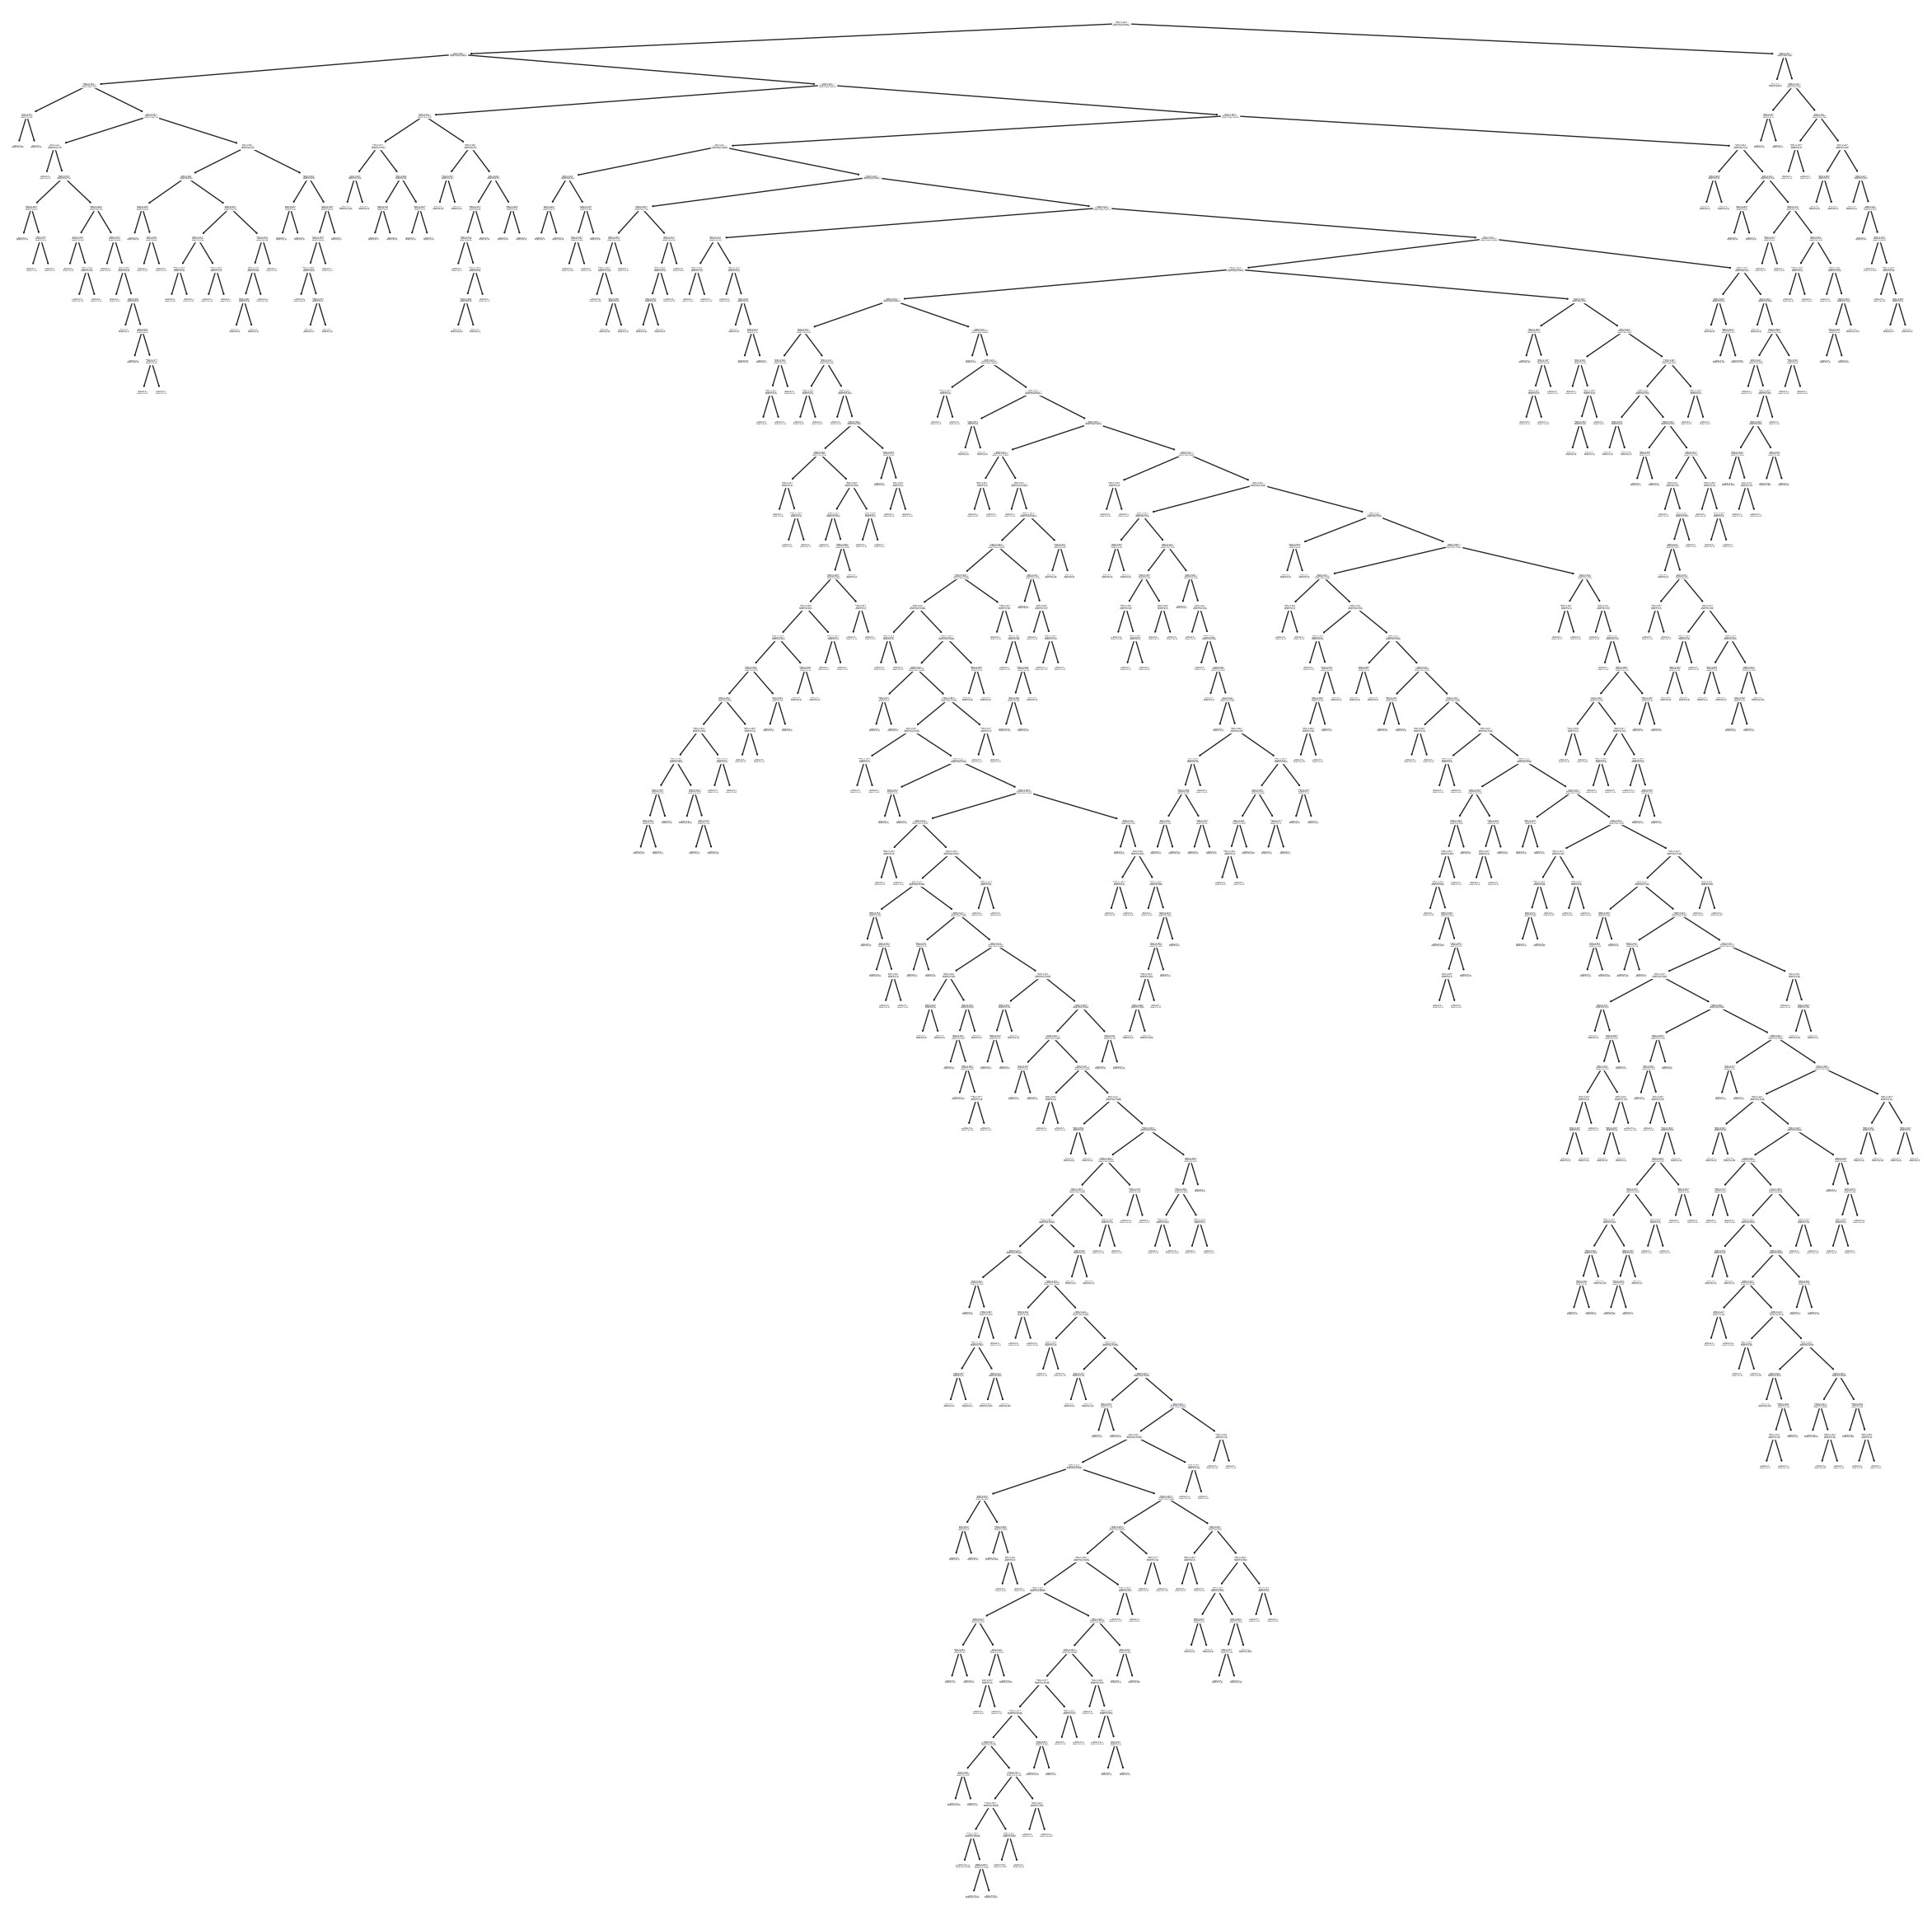

In [24]:
plt.figure(figsize=(30, 30))
plot_tree(dtc)
plt.show()

### 5.3. Test Predictions

In [25]:
startTime = time.time()
y_pred = dtc.predict(X_test)
predict_timers.append(["DTC Default: ", time.time()-startTime])

### 5.4. Create Classifier Report

In [26]:
dtc_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['DTC', dtc_cr])
print(dtc_cr)

              precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776



### 5.5. DTC Confusion Matrix

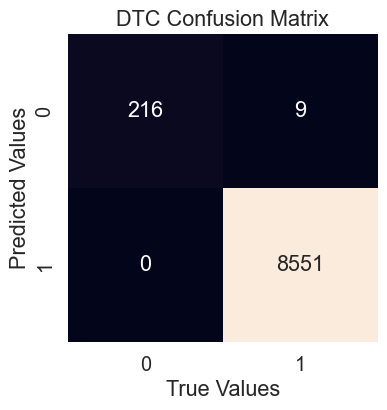

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
dtc_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['DTC', dtc_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("DTC Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 6. Logistic Regression

### 6.1. Load and 'Train' Logistic Regression Classifier Model

In [28]:
lr = LogisticRegression(verbose=True, n_jobs=-1, random_state=1, max_iter=10000) #default: solver = lbfgs
startTime = time.time()
lr.fit(X, y)
train_timers.append(["LR Default: ", time.time()-startTime])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.9s finished


### 6.2. Test Predictions

In [29]:
startTime = time.time()
y_pred = lr.predict(X_test)
predict_timers.append(["LR Default: ", time.time()-startTime])

### 6.3. Create Classification Report

In [30]:
lr_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['LR', lr_cr])
print(lr_cr)

              precision    recall  f1-score   support

           0     0.8000    0.3556    0.4923       225
           1     0.9833    0.9977    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8916    0.6766    0.7414      8776
weighted avg     0.9786    0.9812    0.9777      8776



### 6.4. LR Confusion Matrix

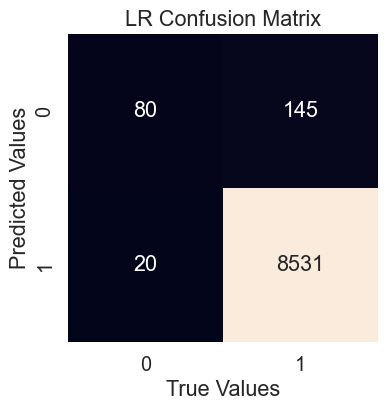

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
lr_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['LR', lr_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("LR Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 7. Support Vector Machine (SVM)*

### 7.1. Load and 'Train' SVM Classifier Model

In [32]:
from sklearn.svm import SVC as SVM

svm = SVM(verbose=True, random_state=1)
startTime = time.time()
svm.fit(X, y)
train_timers.append(["SVM Default: ", time.time()-startTime])

[LibSVM]

### 7.2. Test Predictions

In [33]:
startTime = time.time()
y_pred = svm.predict(X_test)
predict_timers.append(["SVM Default: ", time.time()-startTime])

### 7.3. Create Classification Report

In [34]:
svm_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['SVM', svm_cr])
print(svm_cr)

              precision    recall  f1-score   support

           0     0.9918    0.5378    0.6974       225
           1     0.9880    0.9999    0.9939      8551

    accuracy                         0.9880      8776
   macro avg     0.9899    0.7688    0.8457      8776
weighted avg     0.9881    0.9880    0.9863      8776



### 7.4. SVM Confusion Matrix

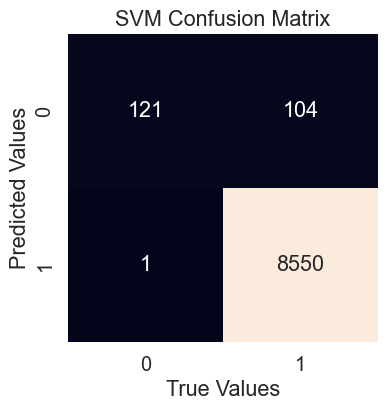

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
svm_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['SVM', svm_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("SVM Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 8. Random Forest*

### 8.1. Load and 'Train' RF Classifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier as RF

rf = RF(verbose=True, random_state=1)
startTime = time.time()
rf.fit(X, y)
train_timers.append(["RF Default: ", time.time()-startTime])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.0s finished


### 8.2. Test Predictions

In [37]:
startTime = time.time()
y_pred = rf.predict(X_test)
predict_timers.append(["RF Default: ", time.time()-startTime])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### 8.3. Create Classification Report

In [38]:
rf_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['RF', rf_cr])
print(rf_cr)

              precision    recall  f1-score   support

           0     1.0000    0.9556    0.9773       225
           1     0.9988    1.0000    0.9994      8551

    accuracy                         0.9989      8776
   macro avg     0.9994    0.9778    0.9883      8776
weighted avg     0.9989    0.9989    0.9988      8776



### 8.4. RF Confusion Matrix

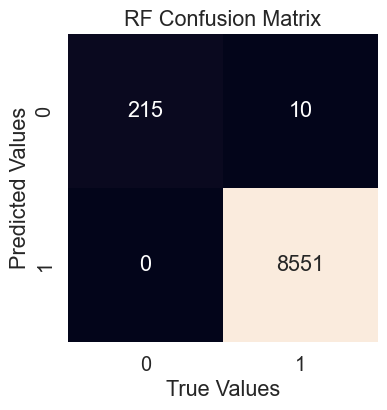

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
rf_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['RF', rf_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("RF Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 9. GNB*

### 9.1. Load and 'Train' GNB Classifier Model

In [40]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb = GNB()
startTime = time.time()
gnb.fit(X, y)
train_timers.append(["GNB Default: ", time.time()-startTime])

### 9.2. Test Predictions

In [41]:
startTime = time.time()
y_pred = gnb.predict(X_test)
predict_timers.append(["GNB Default: ", time.time()-startTime])

### 9.3. Create Classification Report

In [42]:
gnb_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['GNB', gnb_cr])
print(gnb_cr)

              precision    recall  f1-score   support

           0     0.1166    0.4489    0.1852       225
           1     0.9843    0.9105    0.9460      8551

    accuracy                         0.8987      8776
   macro avg     0.5505    0.6797    0.5656      8776
weighted avg     0.9621    0.8987    0.9265      8776



### 9.4. GNB Confusion Matrix

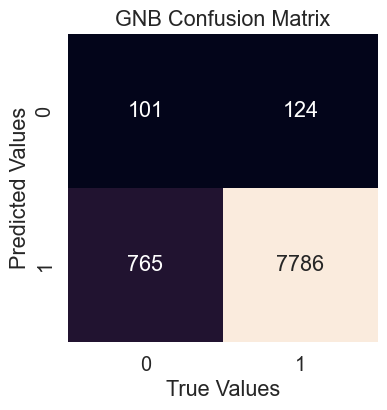

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
gnb_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['GNB', gnb_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("GNB Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 10. AdaBoost*

### 10.1. Load and 'Train' AdaBoost Classifier Model

In [44]:
from sklearn.ensemble import AdaBoostClassifier as ADA

ada = ADA(random_state=1)
startTime = time.time()
ada.fit(X, y)
train_timers.append(["AdaBoost Default: ", time.time()-startTime])

### 10.2. Test Predictions

In [45]:
startTime = time.time()
y_pred = ada.predict(X_test)
predict_timers.append(["AdaBoost Default: ", time.time()-startTime])

### 10.3. Create Classification Report

In [46]:
ada_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['AdaBoost', ada_cr])
print(ada_cr)

              precision    recall  f1-score   support

           0     0.8143    0.5067    0.6247       225
           1     0.9871    0.9970    0.9920      8551

    accuracy                         0.9844      8776
   macro avg     0.9007    0.7518    0.8083      8776
weighted avg     0.9827    0.9844    0.9826      8776



### 10.4. AdaBoost Confusion Matrix

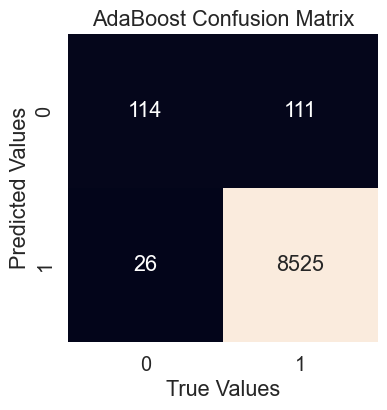

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
ada_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['AdaBoost', ada_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 11. MLP*

*Sort of a Neural Network like ML model.*

### 11.1. Load and 'Train' MLP Classifier Model

In [48]:
from sklearn.neural_network import MLPClassifier as MLP

mlp = MLP(verbose=True, random_state=1)
startTime = time.time()
mlp.fit(X, y)
train_timers.append(["MLP Default: ", time.time()-startTime])

Iteration 1, loss = 1.01994255
Iteration 2, loss = 0.40846543
Iteration 3, loss = 0.28082544
Iteration 4, loss = 0.19094056
Iteration 5, loss = 0.17955473
Iteration 6, loss = 0.14041524
Iteration 7, loss = 0.18533738
Iteration 8, loss = 0.10946493
Iteration 9, loss = 0.24940481
Iteration 10, loss = 0.11265133
Iteration 11, loss = 0.09897762
Iteration 12, loss = 0.10644547
Iteration 13, loss = 0.19506827
Iteration 14, loss = 0.08581602
Iteration 15, loss = 0.09621572
Iteration 16, loss = 0.09796854
Iteration 17, loss = 0.16739862
Iteration 18, loss = 0.09071777
Iteration 19, loss = 0.08774572
Iteration 20, loss = 0.07485759
Iteration 21, loss = 0.06868773
Iteration 22, loss = 0.10975070
Iteration 23, loss = 0.07248746
Iteration 24, loss = 0.07392418
Iteration 25, loss = 0.09167006
Iteration 26, loss = 0.11847634
Iteration 27, loss = 0.06380458
Iteration 28, loss = 0.06236305
Iteration 29, loss = 0.05265977
Iteration 30, loss = 0.05079057
Iteration 31, loss = 0.05302537
Iteration 32, los

### 11.2. Test Predictions

In [49]:
startTime = time.time()
y_pred = mlp.predict(X_test)
predict_timers.append(["MLP Default: ", time.time()-startTime])

### 11.3. Create Classification Report

In [50]:
mlp_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['MLP', mlp_cr])
print(mlp_cr)

              precision    recall  f1-score   support

           0     0.9571    0.8933    0.9241       225
           1     0.9972    0.9989    0.9981      8551

    accuracy                         0.9962      8776
   macro avg     0.9772    0.9461    0.9611      8776
weighted avg     0.9962    0.9962    0.9962      8776



### 11.4. MLP Confusion Matrix

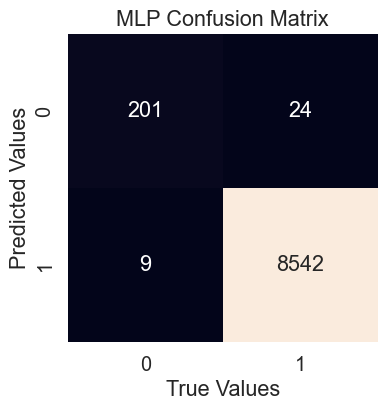

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
mlp_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['MLP', mlp_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("MLP Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 12. Gradient Tree Boosting

*The algorithm of the GTB model in SciKit Learn is inspired by LightGBM.*

### 12.1. Load and 'Train' GBT Classifier Model

In [52]:
from sklearn.ensemble import GradientBoostingClassifier as GBT

gbt = GBT(verbose=True, random_state=1)
startTime = time.time()
gbt.fit(X, y)
train_timers.append(["GBT Default: ", time.time()-startTime])

      Iter       Train Loss   Remaining Time 
         1           0.1605           45.03s
         2           0.1549           44.98s
         3           0.1515           44.44s
         4           0.1485           45.53s
         5           0.1461           45.33s
         6           0.1439           44.70s
         7           0.1414           43.67s
         8           0.1389           43.01s
         9           0.1359           42.88s
        10           0.1337           42.52s
        20           0.1114           37.63s
        30           0.0995           32.51s
        40           0.0906           27.64s
        50           0.0852           24.24s
        60           0.0816           19.29s
        70           0.0766           15.94s
        80           0.0743           11.31s
        90           0.0719            5.70s
       100           0.0696            0.00s


### 12.2. Test Predictions

In [53]:
startTime = time.time()
y_pred = gbt.predict(X_test)
predict_timers.append(["GBT Default: ", time.time()-startTime])

### 12.3. Create Classification Report

In [54]:
gbt_cr = classification_report(y_test, y_pred, digits=4)
cr.append(['GBT', gbt_cr])
print(gbt_cr)

              precision    recall  f1-score   support

           0     0.9620    0.6756    0.7937       225
           1     0.9915    0.9993    0.9954      8551

    accuracy                         0.9910      8776
   macro avg     0.9768    0.8374    0.8946      8776
weighted avg     0.9908    0.9910    0.9902      8776



### 12.4. GBT Confusion Matrix

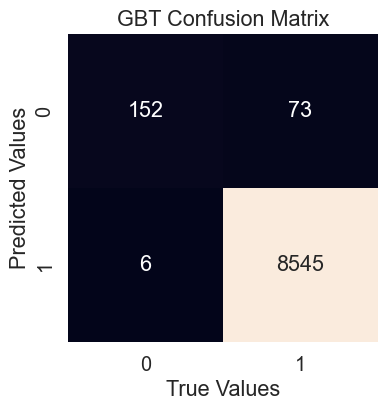

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
gbt_conf_matrix = classification_report(y_test,y_pred, digits=4)
cm.append(['GBT', gbt_conf_matrix])

plt.figure(figsize=(4,4))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("GBT Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

## 13. Comparison of Machine Learning Models

### 13.1 Using SkLearn's Classifier Report

In [56]:
for report in cr:
    print(report[0],"\n",report[1])

KNN 
               precision    recall  f1-score   support

           0     0.9292    0.4667    0.6213       225
           1     0.9861    0.9991    0.9926      8551

    accuracy                         0.9854      8776
   macro avg     0.9577    0.7329    0.8069      8776
weighted avg     0.9847    0.9854    0.9830      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8000    0.3556    0.4923       225
           1     0.9833    0.9977    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8916    0.6766    0.7414      8776
weighted avg     0.9786    0.9812    0.9777      8776

SV

### 13.2. Using Confusion Matrix

In [57]:
for matrix in cm:
    print(matrix[0],"\n",matrix[1])

KNN 
               precision    recall  f1-score   support

           0     0.9292    0.4667    0.6213       225
           1     0.9861    0.9991    0.9926      8551

    accuracy                         0.9854      8776
   macro avg     0.9577    0.7329    0.8069      8776
weighted avg     0.9847    0.9854    0.9830      8776

DTC 
               precision    recall  f1-score   support

           0     1.0000    0.9600    0.9796       225
           1     0.9989    1.0000    0.9995      8551

    accuracy                         0.9990      8776
   macro avg     0.9995    0.9800    0.9895      8776
weighted avg     0.9990    0.9990    0.9990      8776

LR 
               precision    recall  f1-score   support

           0     0.8000    0.3556    0.4923       225
           1     0.9833    0.9977    0.9904      8551

    accuracy                         0.9812      8776
   macro avg     0.8916    0.6766    0.7414      8776
weighted avg     0.9786    0.9812    0.9777      8776

SV

### 13.3. Using Stratified K-Folds Cross Validation comparision for ML Algorithms
For this example, StratifiedKFold will be used to as suppose to the normal K-Folds in order *"to ensure that relative class frequencies are effectively sustained in each train and validation fold when using stratified sampling rather than random sampling"*.

**Reference:**

Prusty, S., Patnaik, S., & Dash, S. K. (2022). *SKCV: Stratified K-fold cross-validation on ML classifiers for predicting cervical cancer*. Frontiers in Nanotechnology, 4. https://www.frontiersin.org/articles/10.3389/fnano.2022.972421

In [58]:
#Default parameters only
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=1)
lr = LogisticRegression(n_jobs=-1)
svm = SVM(random_state=1)
rf = RF(random_state=1)
gnb = GNB()
ada = ADA(random_state=1)
mlp = MLP(random_state=1)
gbt = GBT(random_state=1)

# kf will return list of indices for the train_index and test_index
kfold_results = []
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    sublist = [i]
    axis = 0 
    
    # Extract from the dataframe based on the given indeces
    training_set = np.take(X, train_index, axis)
    training_set_labels = np.take(y, train_index, axis)
    test_set = np.take(X, test_index, axis)
    test_set_labels = np.take(y, test_index, axis)

    knn.fit(training_set,training_set_labels)
    knn_pred = knn.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, knn_pred),4))
    print(f"Fold {i}: KNN Finished")
    
    dtc.fit(training_set,training_set_labels)
    dtc_pred = dtc.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, dtc_pred),4))
    print(f"Fold {i}: DTC Finished")
    
    lr.fit(training_set,training_set_labels)
    lr_pred = lr.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, lr_pred),4))
    print(f"Fold {i}: LR Finished")
    
    svm.fit(training_set,training_set_labels)
    svm_pred = svm.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, svm_pred),4))
    print(f"Fold {i}: SVM Finished")
    
    rf.fit(training_set,training_set_labels)
    rf_pred = rf.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, rf_pred),4))
    
    gnb.fit(training_set,training_set_labels)
    gnb_pred = gnb.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, gnb_pred),4))
    print(f"Fold {i}: GNB Finished")
    
    ada.fit(training_set,training_set_labels)
    ada_pred = ada.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, ada_pred),4))
    print(f"Fold {i}: AdaBoost Finished")
    
    mlp.fit(training_set,training_set_labels)
    mlp_pred = mlp.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, mlp_pred),4))
    print(f"Fold {i}: MLP Finished")
    
    gbt.fit(training_set,training_set_labels)
    gbt_pred = gbt.predict(test_set)
    sublist.append(round(accuracy_score(test_set_labels, gbt_pred),4))
    print(f"Fold {i}: GBT Finished")
    
    kfold_results.append(sublist)
    print(f"Fold {i:0.0f} finished")

Fold 0: KNN Finished
Fold 0: DTC Finished
Fold 0: LR Finished
Fold 0: SVM Finished
Fold 0: GNB Finished
Fold 0: AdaBoost Finished
Fold 0: MLP Finished
Fold 0: GBT Finished
Fold 0 finished
Fold 1: KNN Finished
Fold 1: DTC Finished
Fold 1: LR Finished
Fold 1: SVM Finished
Fold 1: GNB Finished
Fold 1: AdaBoost Finished
Fold 1: MLP Finished
Fold 1: GBT Finished
Fold 1 finished
Fold 2: KNN Finished
Fold 2: DTC Finished
Fold 2: LR Finished
Fold 2: SVM Finished
Fold 2: GNB Finished
Fold 2: AdaBoost Finished
Fold 2: MLP Finished
Fold 2: GBT Finished
Fold 2 finished
Fold 3: KNN Finished
Fold 3: DTC Finished
Fold 3: LR Finished
Fold 3: SVM Finished
Fold 3: GNB Finished
Fold 3: AdaBoost Finished
Fold 3: MLP Finished
Fold 3: GBT Finished
Fold 3 finished
Fold 4: KNN Finished
Fold 4: DTC Finished
Fold 4: LR Finished
Fold 4: SVM Finished
Fold 4: GNB Finished
Fold 4: AdaBoost Finished
Fold 4: MLP Finished
Fold 4: GBT Finished
Fold 4 finished
Fold 5: KNN Finished
Fold 5: DTC Finished
Fold 5: LR Finishe

In [59]:
print("\nPER FOLD")
splits = 0
models = ["KNN", "DTC", "LR", "SVM", "RF", "GNB", "AdaBoost", "MLP", "GBT"]
ave = [0,0,0,0,0,0,0,0,0]
out_str = []
for k in kfold_results:
    out = ""
    for ksub in range(len(k)):
        if ksub == 0:
            out += f"Fold {k[ksub]} "
        else:
            out += f"{models[ksub-1]}: {k[ksub]:.4f} "
            ave[ksub-1] += k[ksub]
    print(out)
    splits += 1
print("")

print("AVERAGE")
ave.sort(reverse=True)
for a in range(len(ave)):
    print(f"{models[a]:10s}: {ave[a]/splits:.4f}")
#print(f"KNN: {ave[0]/splits:.4f} DTC: {ave[1]/splits:.4f} LR: {ave[2]/splits:.4f} SVM: {ave[3]/splits:.4f} RF: {ave[4]/splits:.4f} GNB: {ave[5]/splits:.4f} AdaBoost: {ave[6]/splits:.4f} MLP: {ave[7]/splits:.4f}")


PER FOLD
Fold 0 KNN: 0.9834 DTC: 0.9827 LR: 0.9809 SVM: 0.9829 RF: 0.9870 GNB: 0.8856 AdaBoost: 0.9834 MLP: 0.9804 GBT: 0.9861 
Fold 1 KNN: 0.9872 DTC: 0.9863 LR: 0.9852 SVM: 0.9872 RF: 0.9911 GNB: 0.8940 AdaBoost: 0.9859 MLP: 0.9838 GBT: 0.9888 
Fold 2 KNN: 0.9852 DTC: 0.9859 LR: 0.9847 SVM: 0.9845 RF: 0.9893 GNB: 0.8986 AdaBoost: 0.9870 MLP: 0.9854 GBT: 0.9902 
Fold 3 KNN: 0.9870 DTC: 0.9868 LR: 0.9822 SVM: 0.9868 RF: 0.9920 GNB: 0.8906 AdaBoost: 0.9825 MLP: 0.9856 GBT: 0.9879 
Fold 4 KNN: 0.9845 DTC: 0.9838 LR: 0.9854 SVM: 0.9866 RF: 0.9907 GNB: 0.8981 AdaBoost: 0.9877 MLP: 0.9852 GBT: 0.9902 
Fold 5 KNN: 0.9861 DTC: 0.9863 LR: 0.9825 SVM: 0.9852 RF: 0.9904 GNB: 0.8929 AdaBoost: 0.9815 MLP: 0.9838 GBT: 0.9859 
Fold 6 KNN: 0.9847 DTC: 0.9852 LR: 0.9820 SVM: 0.9859 RF: 0.9893 GNB: 0.8940 AdaBoost: 0.9843 MLP: 0.9834 GBT: 0.9879 
Fold 7 KNN: 0.9840 DTC: 0.9836 LR: 0.9797 SVM: 0.9840 RF: 0.9907 GNB: 0.8970 AdaBoost: 0.9815 MLP: 0.9831 GBT: 0.9875 
Fold 8 KNN: 0.9850 DTC: 0.9845 LR: 0.9

## 14. Algorithm Training Speed

Speed of the algorithm during training/fitting as measured in seconds.

In [60]:
train_timers.sort(key=lambda x: x[1])
for t in train_timers:
    print(f"{t[0]:20s} {t[1]:0.4f}s")

KNN Default:         0.0200s
GNB Default:         0.1259s
DTC Default:         5.4679s
AdaBoost Default:    14.1202s
LR Default:          19.4524s
RF Default:          41.1741s
GBT Default:         54.4329s
SVM Default:         76.2048s
MLP Default:         115.7373s


## 15. Algorithm Prediction Speed

Speed of the algorithm during prediction (per sample) as measured in milliseconds.

In [61]:
predict_timers.sort(key=lambda x: x[1])
for t in predict_timers:
    print(f"{t[0]:20s} {1000*t[1]/len(X_test):0.4f}ms")

LR Default:          0.0014ms
DTC Default:         0.0017ms
GBT Default:         0.0030ms
GNB Default:         0.0037ms
MLP Default:         0.0054ms
AdaBoost Default:    0.0325ms
RF Default:          0.0327ms
SVM Default:         1.1203ms
KNN Default:         1.3026ms
